## IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


## Load the Dataset

In [ ]:
df = pd.read_csv('premier_league.csv')
df.head()

,date,matchday,home_team,away_team,home_score_full_time,away_score_full_time,home_score_half_time,away_score_half_time,goal_diff,winner,defeat,ref
0,2023-08-11T19:00:00Z,1,Burnley,Man City,0,3,0,2,3,Man City,Burnley,Craig Pawson
1,2023-08-12T12:00:00Z,1,Arsenal,Nottingham,2,1,2,0,1,Arsenal,Nottingham,Michael Oliver
2,2023-08-12T14:00:00Z,1,Bournemouth,West Ham,1,1,0,0,0,DRAW,DRAW,Peter Bankes
3,2023-08-12T14:00:00Z,1,Brighton Hove,Luton Town,4,1,1,0,3,Brighton Hove,Luton Town,David Coote
4,2023-08-12T14:00:00Z,1,Everton,Fulham,0,1,0,0,1,Fulham,Everton,Stuart Attwell


# Data Analysis and Preprocessing

In [ ]:
# Checking for null values
print(df.isnull().sum())

# Basic statistics
print(df.describe())

date                    0
matchday                0
home_team               0
away_team               0
home_score_full_time    0
away_score_full_time    0
home_score_half_time    0
away_score_half_time    0
goal_diff               0
winner                  0
defeat                  0
ref                     0
dtype: int64
         matchday  home_score_full_time  away_score_full_time  \
count  380.000000            380.000000            380.000000   
mean    19.500000              1.800000              1.478947   
std     10.980313              1.365616              1.277811   
min      1.000000              0.000000              0.000000   
25%     10.000000              1.000000              1.000000   
50%     19.500000              2.000000              1.000000   
75%     29.000000              3.000000              2.000000   
max     38.000000              6.000000              8.000000   

       home_score_half_time  away_score_half_time   goal_diff  
count            380.0000

# Total Wins by Team

<ipython-input-5-110784b28c59>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wins.index, y=wins.values, palette="viridis")


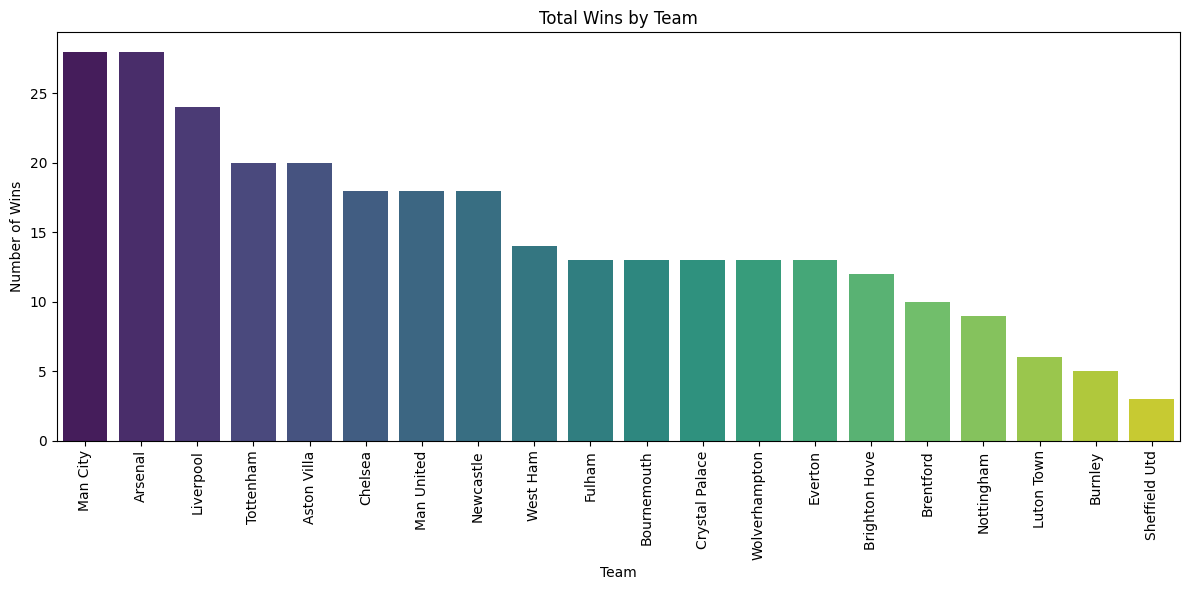

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count wins per team excluding draws
wins = df[df["winner"] != "DRAW"]["winner"].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=wins.index, y=wins.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Total Wins by Team")
plt.ylabel("Number of Wins")
plt.xlabel("Team")
plt.tight_layout()
plt.show()


## COLUMN LIST

In [ ]:
print(df.columns.tolist())

['date', 'matchday', 'home_team', 'away_team', 'home_score_full_time', 'away_score_full_time', 'home_score_half_time', 'away_score_half_time', 'goal_diff', 'winner', 'defeat', 'ref']


# MODEL BUILDING

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load data
df = pd.read_csv('premier_league.csv')

# Label Encoding
le = LabelEncoder()
df['home_team_encoded'] = le.fit_transform(df['home_team'])
df['away_team_encoded'] = le.transform(df['away_team'])

# Features and Target
X = df[['matchday', 'home_team_encoded', 'away_team_encoded']]
y = df['home_score_full_time']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, predictions))


Mean Squared Error: 2.1477184210526317


#  Predict Both Home & Away Scores Togather

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error

# Load data
df = pd.read_csv('premier_league.csv')

# Label Encoding
le = LabelEncoder()
df['home_team_encoded'] = le.fit_transform(df['home_team'])
df['away_team_encoded'] = le.transform(df['away_team'])  # only transform

# Features and Targets
X = df[['matchday', 'home_team_encoded', 'away_team_encoded']]
y = df[['home_score_full_time', 'away_score_full_time']]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train multi-output model
multi_model = MultiOutputRegressor(RandomForestRegressor())
multi_model.fit(X_train, y_train)

# Predictions
multi_preds = multi_model.predict(X_test)

# Evaluation
print("Home Score MSE:", mean_squared_error(y_test['home_score_full_time'], multi_preds[:, 0]))
print("Away Score MSE:", mean_squared_error(y_test['away_score_full_time'], multi_preds[:, 1]))


Home Score MSE: 2.138064473684211
Away Score MSE: 1.499975


# AVAILABLE TEAMS

In [ ]:
print("Available teams in the encoder:")
print(le.classes_)

Available teams in the encoder:
['Arsenal' 'Aston Villa' 'Bournemouth' 'Brentford' 'Brighton Hove'
 'Burnley' 'Chelsea' 'Crystal Palace' 'Everton' 'Fulham' 'Liverpool'
 'Luton Town' 'Man City' 'Man United' 'Newcastle' 'Nottingham'
 'Sheffield Utd' 'Tottenham' 'West Ham' 'Wolverhampton']


# FUTURE MATCH PREDICTIONS

In [ ]:
def predict_future_match(home_team_name, away_team_name, matchday):
    try:
        home_encoded = le.transform([home_team_name])[0]
        away_encoded = le.transform([away_team_name])[0]
    except:
        print(f"Error: Team name not found. Please check spelling.")
        return None, None

    # Create a DataFrame for proper feature names
    input_features = pd.DataFrame({
        'matchday': [matchday],
        'home_team_encoded': [home_encoded],
        'away_team_encoded': [away_encoded]
    })

    # Predict
    predicted_scores = multi_model.predict(input_features)

    home_score = round(predicted_scores[0][0])
    away_score = round(predicted_scores[0][1])

    print(f"Predicted Scoreline for Matchday {matchday}:")
    print(f"{home_team_name} {home_score} - {away_score} {away_team_name}")

    # Predict Winner
    if home_score > away_score:
        print(f"Predicted Winner: {home_team_name}")
    elif away_score > home_score:
        print(f"Predicted Winner: {away_team_name}")
    else:
        print("Predicted Result: Draw")

    return home_score, away_score

# Test the function with sample teams
home_score, away_score = predict_future_match("Liverpool", "Tottenham", 1)

Predicted Scoreline for Matchday 1:
Liverpool 2 - 2 Tottenham
Predicted Result: Draw


In [ ]:
import joblib

# Save the correct multi-output model
joblib.dump(multi_model, 'football_model.pkl')

# Save label encoder
joblib.dump(le, 'label_encoder.pkl')


['label_encoder.pkl']